In [4]:
#standard numpy and matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.animation import FuncAnimation

#mpl_toolkits is used for 3D plotting 
from mpl_toolkits.mplot3d import axes3d

%matplotlib notebook

In [120]:
X = [0.5 , 2.5 , 0.6]
Y = [0.2 , 0.9 , 0.8]

In [121]:
def sigmoid_function(x , w ,b):
    """
    Input - Scalar X , Single Weight and a bias
    Output - Sigmoid(x)
    """
    return (1.0) / (1.0 + np.exp(-(x*w + b)))
    

In [122]:
def error_function(w ,b):
    err = 0 
    for x , y in zip(X , Y):
        err += (0.5) * (sigmoid_function(x , w , b) - y) ** 2
    return err

In [123]:
def grad_w(x, y , w , b):
    return (sigmoid_function(x , w , b) -y)*(sigmoid_function(x ,w ,b)) * (1- sigmoid_function(x , w ,b )) * x

In [124]:
def grad_b(x, y , w , b):
    return (sigmoid_function(x , w ,b) -y)*(sigmoid_function(x , w , b)) * (1- sigmoid_function(x ,w , b))

In [138]:
def gradient_descend():
    w , b , eata , max_iter = -1 , 1 , 0.1 , 10000
    w_array = []
    b_array = []
    w_array.append(w)
    b_array.append(b)
    for i in range(max_iter):
        dw , db = 0 , 0 
        
        for x , y in zip(X,Y):
            dw += grad_w(x,y,w,b)
            db += grad_b(x,y,w,b)
        w -= eata * dw
        b -= eata * db
        w_array.append(w)
        b_array.append(b)
    return w_array , b_array
        

In [139]:
w_random = b_random = np.arange(-20.0, 20.0, 0.5)
w_random , b_random = np.meshgrid(w_random , b_random)

err = []
for i in range(len(w_random[0])):
    
    y_list = []
    for j in range(len(w_random)):
        y_list.append(error_function(w_random[i][j] , b_random[i][j]))
    err.append(y_list)

err = np.array(err)


In [140]:
w_arr , b_arr = gradient_descend()
err_arr = [error_function(w_arr[i] , b_arr[i]) for i in range(len(w_arr))]


<IPython.core.display.Javascript object>


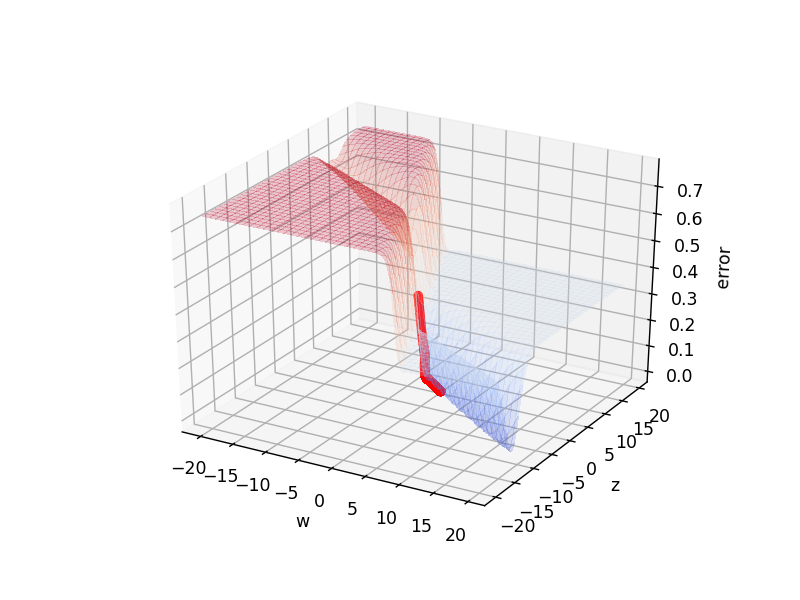

In [141]:

fig = plt.figure()
ax = fig.gca(projection='3d')
sur = ax.plot_surface(w_random,b_random , err , antialiased=False , linewidth=0 , cmap="coolwarm" , alpha= 0.2)
ax.set_xlabel("w")
ax.set_ylabel("z")
ax.set_zlabel("error")

scatter = ax.scatter(w_arr , b_arr , err_arr , c='r')


plt.show()

In [143]:
#MOMENTUM BASED GRADIENT DESCENT

In [163]:
def momentum_grad_descent():
    w , b , eata , max_iter = -1 , 1 , 0.1 , 25
    w_array = []
    b_array = []
    w_array.append(w)
    b_array.append(b)
    gamma = 0.9
    prev_w , prev_b = 0 , 0
    for i in range(max_iter):
        dw , db = 0 , 0 
        
        for x , y in zip(X,Y):
            dw += grad_w(x,y,w,b)
            db += grad_b(x,y,w,b)
        w_update = gamma * prev_w + eata* dw
        b_update = gamma * prev_b + eata* db
        w -= w_update
        b -= b_update
        prev_w = w_update
        prev_b = b_update
        w_array.append(w)
        b_array.append(b)
    return w_array , b_array
        

In [164]:
w_arr , b_arr = momentum_grad_descent()
err_arr1 = [error_function(w_arr[i] , b_arr[i]) for i in range(len(w_arr))]
err_arr1

[0.36695583679755,
 0.360459930058874,
 0.34751217944480955,
 0.3278018536515729,
 0.30124765515168134,
 0.2690268927318753,
 0.2347650940254135,
 0.20440130482031024,
 0.1832471257432055,
 0.17252400378000537,
 0.16955887563136057,
 0.17067630637151907,
 0.17314797306983357,
 0.17545781934057836,
 0.17690898419791437,
 0.17724098012261313,
 0.17639909497659956,
 0.17441867075299397,
 0.17137308238690907,
 0.16735335021253572,
 0.16246280733356125,
 0.15681874621666667,
 0.15055700774060937,
 0.14383717152254707,
 0.13684653757457246,
 0.1298010712014522]

<IPython.core.display.Javascript object>


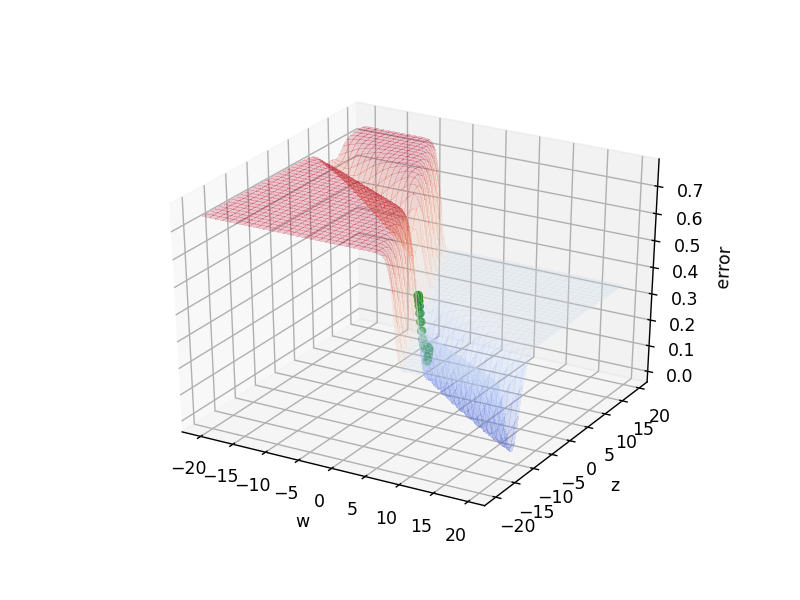

In [165]:

fig = plt.figure()
ax = fig.gca(projection='3d')
sur = ax.plot_surface(w_random,b_random , err , antialiased=False , linewidth=0 , cmap="coolwarm" , alpha= 0.2)
ax.set_xlabel("w")
ax.set_ylabel("z")
ax.set_zlabel("error")

scatter = ax.scatter(w_arr , b_arr , err_arr1 , c='g')


plt.show()

In [179]:
def nag():
    w , b , eata , max_iter = -1 , 1 , 0.1 , 25
    w_array = []
    b_array = []
    w_array.append(w)
    b_array.append(b)
    gamma = 0.9
    prev_w , prev_b = 0 , 0
    for i in range(max_iter):
        dw , db = 0 , 0 
        
        
        w = w -  gamma *prev_w
        b = b -  gamma*prev_b
        
        for x , y in zip(X,Y):
            dw += grad_w(x,y,w,b)
            db += grad_b(x,y,w,b)
       
        w -= eata * dw
        b -= eata * db
        prev_w = gamma * prev_w + eata * dw
        prev_b = gamma * prev_b + eata * db
        w_array.append(w)
        b_array.append(b)
    return w_array , b_array

In [180]:
w_arr , b_arr = nag()
err_arr2 = [error_function(w_arr[i] , b_arr[i]) for i in range(len(w_arr))]
err_arr2

[0.36695583679755,
 0.360459930058874,
 0.3473633919080584,
 0.3272644090380425,
 0.30016261683282747,
 0.267655665115406,
 0.23395767254962863,
 0.20489075758480246,
 0.18455509513079568,
 0.17318330923547298,
 0.16831734565862422,
 0.167058568490038,
 0.1672490892754946,
 0.16760106665796692,
 0.16744697239963813,
 0.16648540672993895,
 0.16461355497036748,
 0.1618339082782865,
 0.1582072302479478,
 0.1538309547696718,
 0.1488304755774487,
 0.14335608022287288,
 0.13758109731782514,
 0.13169823586022683,
 0.12591195270244887,
 0.12042560957491366]

<IPython.core.display.Javascript object>


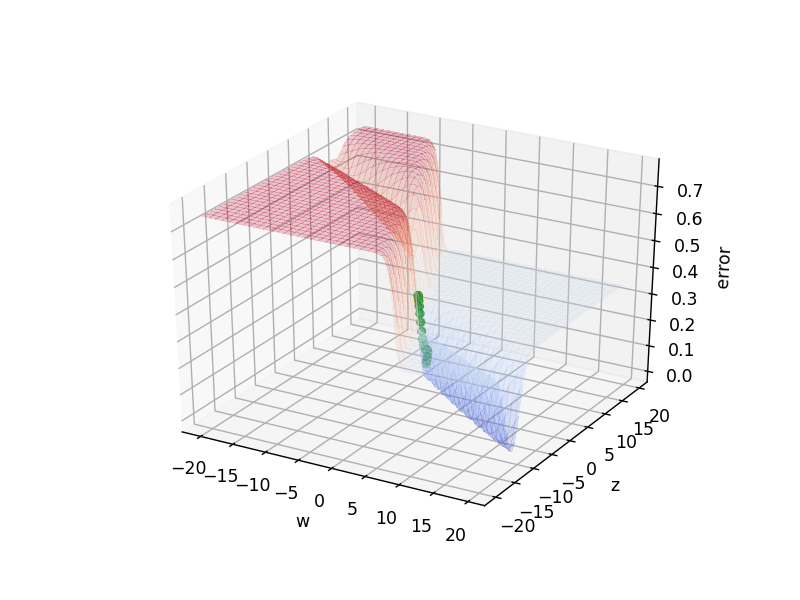

In [181]:

fig = plt.figure()
ax = fig.gca(projection='3d')
sur = ax.plot_surface(w_random,b_random , err , antialiased=False , linewidth=0 , cmap="coolwarm" , alpha= 0.2)
ax.set_xlabel("w")
ax.set_ylabel("z")
ax.set_zlabel("error")

scatter = ax.scatter(w_arr , b_arr , err_arr2 , c='g')


plt.show()